In [16]:
%matplotlib inline

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import combo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing as pp

In [18]:
#Import Data
os.chdir('C:\Users\senth\Desktop\Files_Desktop_access')
Master_Data = pd.read_csv('Dummy_Data.csv')
Master_Data.head(5)

,X,Y,Theta,Cos_Theta,Sin_Theta,Z
0,1,2,0,1.000000,0.000000,1.000000
1,2,4,45,0.525322,0.850904,15.715744
2,3,6,90,-0.448074,0.893997,28.151217
3,4,8,180,-0.598460,-0.801153,-60.849130
4,5,10,270,0.984382,-0.176046,7.004954


In [19]:
# Input and output columns in Dataframe
Input = ['X','Y','Theta']

Output = 'Z'

In [20]:
# Name Input and target values
X = Master_Data[Input].values
y = Master_Data[Output].values

In [21]:
X_Sc = pp.scale(X)
y_Sc = pp.scale(y)

C:\Users\senth\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [22]:
#Split train and test data

X_train, X_test, y_train, y_test = train_test_split(X_Sc, y_Sc, test_size=0.4, random_state=3)

# Fit Combo Model
cov = combo.gp.cov.gauss(X_train.shape[1], ard = False)
mean = combo.gp.mean.zero()
lik = combo.gp.lik.gauss()
gp = combo.gp.model(lik = lik,mean = mean, cov = cov)
config = combo.misc.set_config()
np.random.seed(1000)
index = np.random.permutation(xrange(X_train.shape[0]))
train_X = X_train[index,:]
train_t = y_train[index]
model = gp.fit(train_X, train_t, config)
gp.prepare(train_X, train_t)

#Predict using combo model
y_predicted = gp.get_post_fmean(train_X, X_test)


Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 23.5952574187
50 -th epoch marginal likelihood 23.2854590977
100 -th epoch marginal likelihood 23.2424604487
150 -th epoch marginal likelihood 23.2355103741
200 -th epoch marginal likelihood 23.2307091828
250 -th epoch marginal likelihood 23.2267137906
300 -th epoch marginal likelihood 23.2233946292
350 -th epoch marginal likelihood 23.2206251613
400 -th epoch marginal likelihood 23.2182891555
450 -th epoch marginal likelihood 23.2162907464
500 -th epoch marginal likelihood 23.2145564136
Done



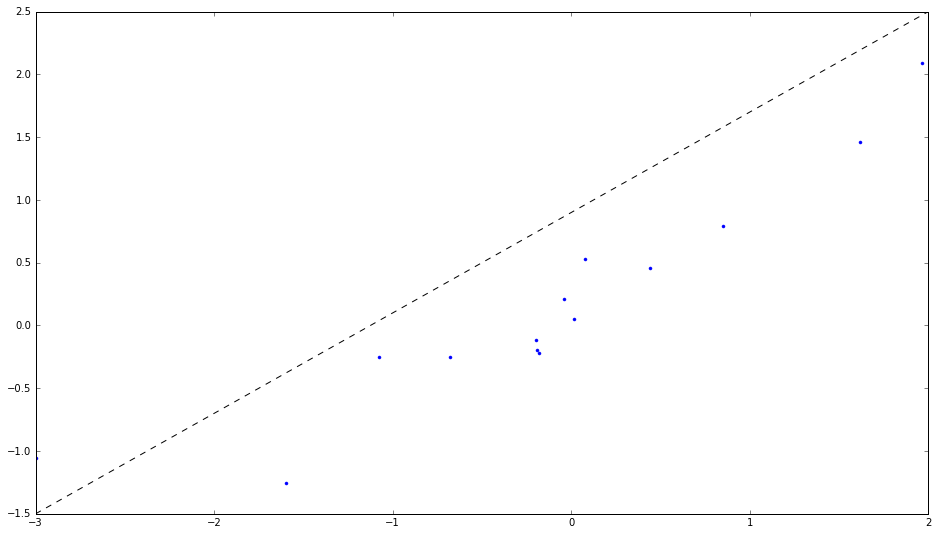

In [23]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
ax.plot(y_test,y_predicted,'.')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.plot(xlim, ylim, 'k--')

In [24]:
R2 = r2_score(y_test,y_predicted)
R2

0.75038970904913493

In [25]:
y_test

array([-0.19870274,  0.01510049, -1.07614709,  0.84899403,  0.44126065,
        0.0772613 , -0.04037448,  1.6180958 , -0.67713499,  1.96280229,
       -0.18026569, -1.59607195, -2.99865994, -0.19316382])

In [26]:
y_predicted

array([-0.11352783,  0.0528524 , -0.25207691,  0.79579838,  0.46143643,
        0.53303299,  0.20914907,  1.46461836, -0.25292016,  2.0892567 ,
       -0.21653783, -1.25699839, -1.05215008, -0.19760755])

In [27]:
MSE = mean_squared_error(y_test,y_predicted)

In [28]:
MSE

0.36326496682007459